## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import pyclustering

## Import csv to data frame ##
a2 = pd.read_csv('clustering.csv') 

## Separate the class and feature matrix ##
a2_feature = a2.iloc[:,0:7]
a2_class = a2.iloc[:,7]

2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

In [ ]:
# Preprocessing process - Normalization
from sklearn.preprocessing import StandardScaler
a2_norm = StandardScaler().fit_transform(a2_feature)

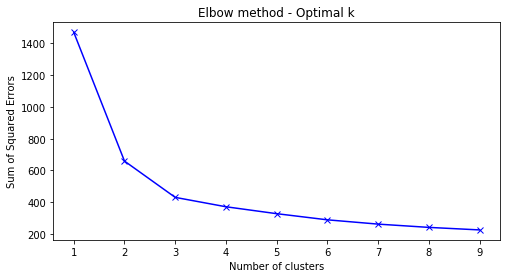

From above graph, optimal number of clusters is 3, which is the same as number of classes in dataset (three classes: 0,1,2)


In [ ]:
## Determine the number of clusters ##

from sklearn.cluster import KMeans

SSE = []
K = range(1,10)
for k in K:
    Elbow_method = KMeans(n_clusters = k, random_state = 0, max_iter = 1000).fit(a2_norm)
    SSE.append(Elbow_method.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(K, SSE, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow method - Optimal k')
plt.show()

## Is this same as the actual number of classes in the dataset? ##
# Answer:
print ('From above graph, optimal number of clusters is 3, which is the same as number of classes in dataset (three classes: 0,1,2)')

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [ ]:
############################
# Develop purity function #
from sklearn import metrics
def purity(y_true, y_predicted):
    # create contingency table
    cont_matrix = metrics.cluster.contingency_matrix(y_true, y_predicted)
    print (cont_matrix)
    # calculate purity
    return np.sum(np.amax(cont_matrix, axis=0)) / np.sum(cont_matrix)
############################

In [ ]:
## Perform K-Means clustering ##
Model_kmean = KMeans(n_clusters=3, random_state = 0, max_iter = 1000)
Model_kmean.fit(a2_norm)
predict = Model_kmean.predict(a2_norm)

In [ ]:
## Compute purity score ##
Purity = purity(a2_class,predict)
print('The purity score is', Purity)

[[62  6  2]
 [ 5  0 65]
 [ 4 66  0]]
The purity score is 0.919047619047619


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [ ]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import distance_metric, type_metric

In [ ]:
## Run K-means with Euclidean and calculate purity score ##

# Find initial centers using K-Means++
centers1 = kmeans_plusplus_initializer(a2_norm, 3, random_state =0).initialize()
# Create metric Euclidean
euc = distance_metric(type_metric.EUCLIDEAN)
# Create instance of K-Means algorithm
kmeans1 = kmeans(a2_norm, centers1, metric = euc, itermax = 1000)
# Run cluster analysis
kmeans1.process()
predict1 = kmeans1.predict(a2_norm)

#Calculate purity
Purity1 = purity(a2_class,predict1)

[[ 2  9 59]
 [64  0  6]
 [ 0 66  4]]


In [ ]:
## Run K-means with Euclidean Square and calculate purity score ##

# Find initial centers using K-Means++
centers2 = kmeans_plusplus_initializer(a2_norm, 3, random_state =0).initialize()
# Create metric Euclidean Square 
eucsq = distance_metric(type_metric.EUCLIDEAN_SQUARE)
# Create instance of K-Means algorithm
kmeans2 = kmeans(a2_norm, centers2, metric = eucsq, itermax = 1000)
# Run cluster analysis
kmeans2.process()
predict2 = kmeans2.predict(a2_norm)

#Calculate purity
Purity2 = purity(a2_class,predict2)

[[ 2  7 61]
 [65  0  5]
 [ 0 66  4]]


In [ ]:
## Run K-means with Manhattan and calculate purity score ##

# Find initial centers using K-Means++
centers3 = kmeans_plusplus_initializer(a2_norm, 3, random_state =0).initialize()
# Create metric Manhattan
mht = distance_metric(type_metric.MANHATTAN)
# Create instance of K-Means algorithm
kmeans3 = kmeans(a2_norm, centers3, metric = mht, itermax = 1000)
# Run cluster analysis
kmeans3.process()
predict3 = kmeans3.predict(a2_norm)

#Calculate purity
Purity3 = purity(a2_class,predict3)

[[ 2 11 57]
 [61  0  9]
 [ 0 68  2]]


In [ ]:
## Run K-means with Chebyshev and calculate purity score ##

# Find initial centers using K-Means++
centers4 = kmeans_plusplus_initializer(a2_norm, 3, random_state =0).initialize()
# Create metric Chebyshev
cheb = distance_metric(type_metric.CHEBYSHEV)
# Create instance of K-Means algorithm
kmeans4 = kmeans(a2_norm, centers4, metric = cheb, itermax = 1000)
# Run cluster analysis
kmeans4.process()
predict4 = kmeans4.predict(a2_norm)

#Calculate purity
Purity4 = purity(a2_class,predict4)

[[ 5  7 58]
 [68  0  2]
 [ 0 61  9]]


In [ ]:
## Run K-means with MINKOWSKI and calculate purity score ##

# Find initial centers using K-Means++
centers5 = kmeans_plusplus_initializer(a2_norm, 3, random_state =0).initialize()
# Create metric Minkowski, degree=4 
mink = distance_metric(type_metric.MINKOWSKI, degree=4)
# Create instance of K-Means algorithm
kmeans5 = kmeans(a2_norm, centers5, metric = mink, itermax = 1000)
# Run cluster analysis
kmeans5.process()
predict5 = kmeans5.predict(a2_norm)

#Calculate purity
Purity5 = purity(a2_class,predict5)

[[ 5  5 60]
 [66  0  4]
 [ 0 65  5]]


In [ ]:
# Compare results
print('(To improve the perfomance of K means, we use normalization pre-process for features matrix, and set random_state=0 and max_iteration=1000 for kmeans)')
print('The purity score of K means using Euclidean is', Purity1)
print('The purity score of K means using Euclidean Square is', Purity2)
print('The purity score of K means using Manhattan is', Purity3)
print('The purity score of K means using Chebyshev is', Purity4)
print('The purity score of K means using Minkowski, degree=4 is', Purity5)
print('Based on purity results, purity score of K means using Euclidean Square is highest, followed by Minkowski, Euclidean, Chebyshev  and Manhattan.')

(To improve the perfomance of K means, we use normalization pre-process for features matrix, and set random_state=0 and max_iteration=1000 for kmeans)
The purity score of K means using Euclidean is 0.9
The purity score of K means using Euclidean Square is 0.9142857142857143
The purity score of K means using Manhattan is 0.8857142857142857
The purity score of K means using Chebyshev is 0.8904761904761904
The purity score of K means using Minkowski, degree=4 is 0.9095238095238095
Based on purity results, purity score of K means using Euclidean Square is highest, followed by Minkowski, Euclidean, Chebyshev  and Manhattan.


In [ ]:
# Select the best distance metric
print('Manhattan and Chebyshev distance have poor performance than others.')
print('Minkowski is based on the degree value, so it will take time to find the best degree value.')
print('Euclidean and Square Euclidean is basically the same, except Square Euclidean does not take square root. Therefore, Square Euclidean performs faster.')
print('Therefore, Square Euclidean is the best distance metric for this dataset.')

Manhattan and Chebyshev distance have poor performance than others.
Minkowski is based on the degree value, so it will take time to find the best degree value.
Euclidean and Square Euclidean is basically the same, except Square Euclidean does not take square root. Therefore, Square Euclidean performs faster.
Therefore, Square Euclidean is the best distance metric for this dataset.


5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [ ]:
## ANOVA feature selection ##
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

A = a2.iloc[:,0:7]
B = a2.iloc[:,7]

# Create SelectKBest object to select features with 3 best ANOVA F-Values
sec_fvalue = SelectKBest(f_classif, k=3)
A_best = sec_fvalue.fit_transform(A, B)

print("The 3 best features by ANOVA feature selection is Height, Length and Min")

The 3 best features by ANOVA feature selection is Height, Length and Min


In [ ]:
## Perform K-Means clustering ##
Kmean_mod = KMeans(n_clusters=3, random_state = 0, max_iter = 1000)
Kmean_mod.fit(A_best)
predict6 = Kmean_mod.predict(A_best)

#Calculate purity
Purity6 = purity(B,predict6)

[[ 1 17 52]
 [55  0 15]
 [ 0 70  0]]


In [ ]:
## Chi Square feature selection ##
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C = a2.iloc[:,0:7]
D = a2.iloc[:,7]

C_int = C.astype(int)

# Create SelectKBest object to select features with 3 best Chi-squared stats
sec_chi2 = SelectKBest(chi2, k=3)
C_best = sec_chi2.fit_transform(C_int, D)

print ('The 3 best features by Chi2 feature seclection is Height, Length and Max')

The 3 best features by Chi2 feature seclection is Height, Length and Max


In [ ]:
## Perform K-Means clustering ##
Kmean_mod1 = KMeans(n_clusters=3, random_state = 0, max_iter = 1000)
Kmean_mod1.fit(C.loc[:,['height','length','max']])
predict7 = Kmean_mod1.predict(C.loc[:,['height','length','max']])

#Calculate purity
Purity7 = purity(D,predict7)

[[ 9  1 60]
 [ 0 60 10]
 [68  0  2]]


In [ ]:
# Based on the purity score which feature set are you going to recommend and why?

print('The purity score of Kmeans using ANOVA feature selection is', Purity6)
print('The purity score of Kmeans using Chi-Square feature seclection is', Purity7)
print('The purity score of K means using Chi-Square is higher than that using Anova. Therefore, to have better results of K means, we recommend to use 3 features: Height, Length, Max.')

The purity score of Kmeans using ANOVA feature selection is 0.8428571428571429
The purity score of Kmeans using Chi-Square feature seclection is 0.8952380952380953
The purity score of K means using Chi-Square is higher than that using Anova. Therefore, to have better results of K means, we recommend to use 3 features: Height, Length, Max.


# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [ ]:
## Plot the captured variance with respect to increasing latent dimensionality ##
ft = a2.iloc[:,0:7]
gt = a2.iloc[:,7]

# Normalize features(ft)
ft_std = StandardScaler().fit_transform(ft)

The variance that each principal component explains are [7.18743027e-01 1.71081835e-01 9.68576341e-02 9.76635386e-03
 2.67337271e-03 7.61720812e-04 1.16056686e-04]
The cummulative variance are [ 71.874  88.982  98.668  99.645  99.912  99.988 100.   ]


Text(0, 0.5, 'Cummulative Variances')

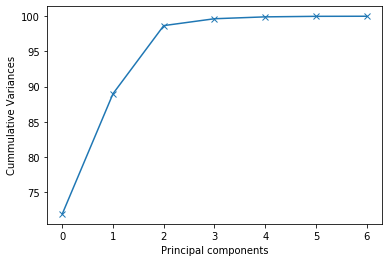

In [ ]:
# Run PCA all observed dimension
pca_test = PCA(n_components=7)
pca_test.fit(ft_std)

# Variance that each principal component explains
var_test = pca_test.explained_variance_ratio_
print('The variance that each principal component explains are', var_test)

#Cumulative Variances
cummulative_var = np.cumsum(np.round(pca_test.explained_variance_ratio_, decimals=5)*100)
print('The cummulative variance are', cummulative_var)

#Plot cummulative variances
plt.plot(cummulative_var, marker = 'x')
plt.xlabel("Principal components")
plt.ylabel("Cummulative Variances")

In [ ]:
## What is the minimum dimension that captures at least 89% variance? ##
pca_89 = PCA(n_components=0.89)
Z89 = pca_89.fit_transform(ft_std)
print(Z89.shape)
print('The minimum dimensions that captures at least 89% variance are',3)

(210, 3)
The minimum dimensions that captures at least 89% variance are 3


In [ ]:
## What is the minimum dimension that captures at least 99% variance? ##
pca_99 = PCA(n_components=0.99)
Z99 = pca_99.fit_transform(ft_std)
print(Z99.shape)
print('The minimum dimensions that captures at least 99% variance are',4)

(210, 4)
The minimum dimensions that captures at least 99% variance are 4


2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

In [ ]:
# Determine the purity of clusters formed by the number of principal components which captured 89% variances ##
Kmean_89 = KMeans(n_clusters=3, random_state = 0, max_iter = 1000)
Kmean_89.fit(Z89)
predict8 = Kmean_89.predict(Z89)

#Calculate purity
Purity8 = purity(gt,predict8)

[[60  2  8]
 [ 5 65  0]
 [ 4  0 66]]


In [ ]:
# Determine the purity of clusters formed by the number of principal components which captured 99% variances ##
Kmean_99 = KMeans(n_clusters=3, random_state = 0, max_iter = 1000)
Kmean_99.fit(Z99)
predict9 = Kmean_99.predict(Z99)

#Calculate purity
Purity9 = purity(gt,predict9)

[[62  2  6]
 [ 5 65  0]
 [ 4  0 66]]


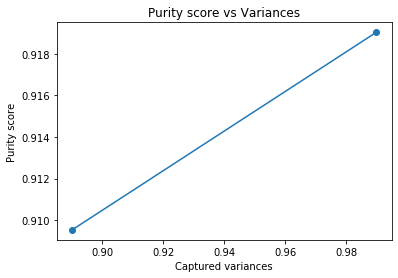

The purity score of 3 principal components capturing 89% variances is 0.9095238095238095
The purity score of 4 principal components capturing 99% variances is 0.919047619047619
Based on line chart, our finding is that the more variances captured, which means more principal components used, the higher purity score, the better K means result
Further checking to enhance above finding, we calculate that the purity of using 2 component is same as using 3 components, and purity of using 1 component is 0.8571428571428571


In [ ]:
#Plot a line graph of the purity scores against the captured variances#
point1 = [0.89, Purity8]
point2 = [0.99, Purity9]

x = [point1[0], point2[0]]
y = [point1[1], point2[1]]

plt.plot(x,y, marker ='o')
plt.title('Purity score vs Variances')
plt.xlabel('Captured variances')
plt.ylabel('Purity score')
plt.show()

print('The purity score of 3 principal components capturing 89% variances is', Purity8)
print('The purity score of 4 principal components capturing 99% variances is', Purity9)
print('Based on line chart, our finding is that the more variances captured, which means more principal components used, the higher purity score, the better K means result')
print('Further checking to enhance above finding, we calculate that the purity of using 2 component is same as using 3 components, and purity of using 1 component is 0.8571428571428571')

3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

In [ ]:
print('PCA can apply for both linear and non-linear datasets as long as there are linear relationship between variables.')
print('And in case there are non-linear relationship between variables of interest, we can transform variabes to have linear relationship between them.')

PCA can apply for both linear and non-linear datasets as long as there are linear relationship between variables.
And in case there are non-linear relationship between variables of interest, we can transform variabes to have linear relationship between them.


In [ ]:
print('In fact, there are non-linear PCA technique. and PCA is a special case of nonlinear PCA.')
print('Nonlinear PCA transforms to PCA if:')
print('- Dataset is Gaussian or - not enough data to make non-Gaussian structure')

In fact, there are non-linear PCA technique. and PCA is a special case of nonlinear PCA.
Nonlinear PCA transforms to PCA if:
- Dataset is Gaussian or - not enough data to make non-Gaussian structure
